In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
# Load the dataset
stocks_data = pd.read_csv("stocks.csv")

# Display the first few rows of the dataset
print(stocks_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


# The dataset contains the following columns for stock market data:

*   Ticker: The stock ticker symbol.

*   Date: The trading date.

*   Open: The opening price of the stock for the day.

*   High: The highest price of the stock during the day.

*   Low: The lowest price of the stock during the day.

*   Close: The closing price of the stock for the day.

*   Adj Close: The adjusted closing price, which accounts for all corporate     actions such as dividends, stock splits, etc.

*   Volume: The number of shares traded during the day.

# To perform a quantitative analysis, we can explore various statistical concepts like descriptive statistics, time series analysis, correlation analysis, and more. Here are some potential analyses we can perform:

In [17]:
stocks_data.shape

(248, 8)

In [14]:
stocks_data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Descriptive Statistics: Summary statistics (mean, median, standard deviation, etc.) for each stock.

## Time Series Analysis: Trends and patterns over time, especially for closing prices.

## Volatility Analysis: How much the stock price fluctuates over a period.

## Correlation Analysis: How stock prices of different companies are related to each other.

## Comparative Analysis: Comparing the performance of different stocks.

## Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

## MACD Analysis: This can help identify trends in the stock price and potential buy or sell signals by comparing the moving average convergence divergence with its signal line.

## Bollinger Bands: These bands can give you an idea about the stock's volatility and whether it's potentially overbought or oversold, based on its position relative to the bands.

## Monte Carlo Simulation: This simulation is valuable for forecasting and understanding the range of possible future stock price movements based on historical volatility and return patterns.

# Descriptive Statistics:

### Descriptive Statistics will provide summary statistics for each stock in the dataset. We’ll look at measures such as mean, median, standard deviation, and more for the Close prices:

In [3]:
# Descriptive Statistics for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()

print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


## Let’s break down the results for each stock:

### AAPL (Apple Inc.):

*   Count: 62.0 (The number of observations or trading days included in the dataset for AAPL)

*   Mean: 158.24 (The average closing price)

*   Standard Deviation: 7.36 (Measures the amount of variation or dispersion of closing prices)
*   Minimum: 145.31 (The lowest closing price in the dataset)

*   25th Percentile: 152.08 (25% of the closing prices are below this value)

*   Median (50%): 158.06 (The middle value of the closing prices)

*   75th Percentile: 165.16 (75% of the closing prices are below this value)

*   Maximum: 173.57 (The highest closing price in the dataset)

### GOOG (Alphabet Inc.)

Similar statistics as AAPL, but for GOOG. The mean closing price is 100.63, with a standard deviation of 6.28, indicating less variability in closing prices compared to AAPL.

###MSFT (Microsoft Corporation)

The dataset includes the same number of observations for MSFT. It has a higher mean closing price of 275.04 and a higher standard deviation of 17.68, suggesting greater price variability than AAPL and GOOG.


### NFLX (Netflix Inc.)
NFLX shows the highest mean closing price (327.61) among these stocks and the highest standard deviation (18.55), indicating the most significant price fluctuation.

# Time Series Analysis:

###Next, we’ll proceed with the Time Series Analysis to examine trends and patterns over time, focusing on the closing prices:

In [4]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# Show the plot
fig.show()

#The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

###Trend: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.

###Volatility: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.

###Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.

#Volatility Analysis:

###Next, let’s focus on Volatility Analysis. We’ll calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [5]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

#The bar chart and the accompanying data show the volatility (measured as standard deviation) of the closing prices for each stock. Here’s how they rank in terms of volatility:

###NFLX: Highest volatility with a standard deviation of approximately 18.55.

###MSFT: Next highest, with a standard deviation of around 17.68.

###AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.

###GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.

#It indicates that NFLX and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

# Correlation Analysis:

###Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

In [6]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

##The heatmap above displays the correlation matrix of the closing prices of the four stocks (AAPL, GOOG, MSFT, NFLX). Here’s what the correlation coefficients suggest:


###Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
###Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
###Values around 0 indicate a lack of correlation.

##From the heatmap, we can observe that there are varying degrees of positive  correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.

#Comparative Analysis:

###Now, let’s move on to Comparative Analysis. In this step, we’ll compare the performance of different stocks based on their returns over the period. We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock:

In [7]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

##The bar chart and the accompanying data show the percentage change in the closing prices of the stocks from the start to the end of the observed period:

###MSFT: The highest positive change of approximately 16.10%.
###APL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.
###GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.
###NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.

#Daily Risk Vs. Return Analysis

##To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.


##We will then plot these values to visually assess the risk-return profile of each stock. Stocks with higher average returns and lower risk (standard deviation) are generally more desirable, but investment decisions often depend on the investor’s risk tolerance:

In [8]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

###So, AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

###MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return, indicating it was the most volatile and least rewarding investment among these stocks over the analyzed period.

 ## MACD Analysis:

###In our next step of quantitative analysis, we'll be focusing on the Moving Average Convergence Divergence (MACD) for AAPL stock. MACD is a momentum indicator that highlights the relationship between two moving averages of stock prices. By observing the MACD line in relation to the signal line, we can gauge potential momentum shifts and make predictions about future price movements. A crossover of the MACD line above the signal line indicates a bullish trend, suggesting a potential entry point for investors. Conversely, a crossover below could signify a bearish trend, indicating a possible exit point.

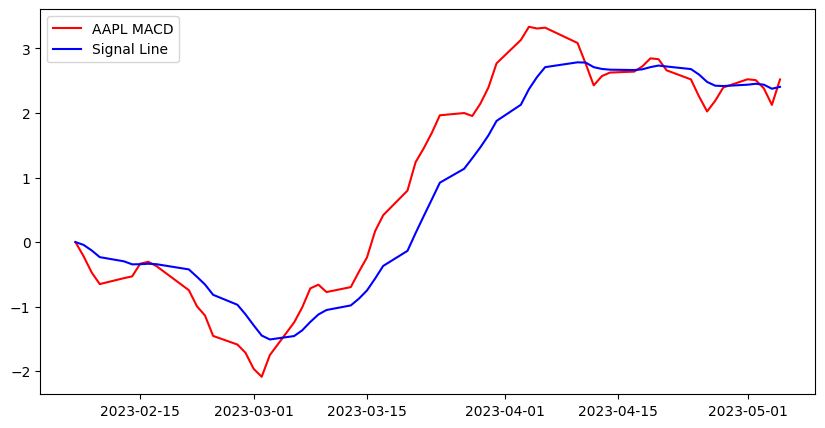

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    MACD = short_ema - long_ema
    signal_line = MACD.ewm(span=signal, adjust=False).mean()
    return MACD, signal_line

# Applying MACD analysis for AAPL
aapl_data = stocks_data[stocks_data['Ticker'] == 'AAPL']
MACD, signal_line = calculate_macd(aapl_data['Close'])
aapl_data = aapl_data.assign(MACD=MACD.values, Signal=signal_line.values)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(aapl_data['Date'], aapl_data['MACD'], label='AAPL MACD', color = 'red')
plt.plot(aapl_data['Date'], aapl_data['Signal'], label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()

###Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a stock’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the stock when the MACD crosses above its signal line and sell, or short, the stock when the MACD crosses below the signal line.

###In the provided MACD chart for AAPL, the red line represents the MACD line while the blue line signifies the signal line. Observing the crossover points provides potential buy and sell signals. For example, when the red line crosses above the blue line, it suggests a bullish trend, and it may be considered a buying opportunity. Conversely, when the red line crosses below the blue line, it may be considered bearish, potentially signaling a selling point.

##Bollinger Bands:


###Continuing our examination of AAPL's stock performance, we turn to Bollinger Bands. This analysis will help us understand the stock's volatility over time. Bollinger Bands consist of an upper and lower band, each set at a standard deviation away from a simple moving average (SMA) of the stock's price. When the stock price moves towards the upper band, it may be considered overbought; when it trends towards the lower band, it could be oversold.

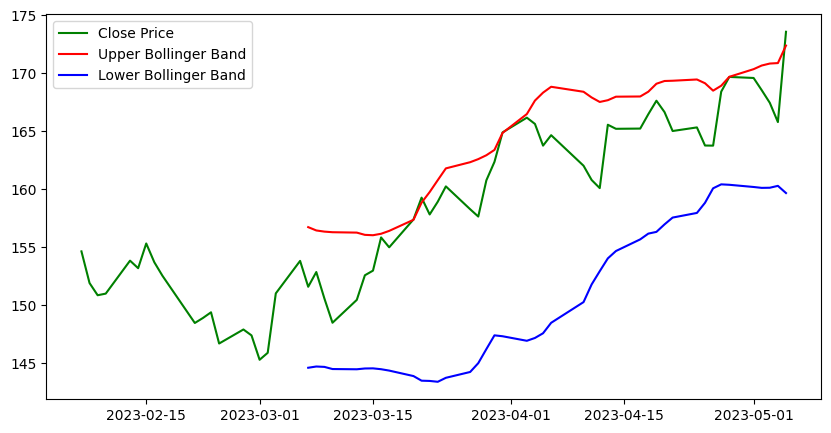

In [11]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    return upper_band, lower_band

# Applying Bollinger Bands for AAPL
upper_band, lower_band = calculate_bollinger_bands(aapl_data['Close'])
aapl_data = aapl_data.assign(UpperBand=upper_band.values, LowerBand=lower_band.values)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='Close Price', color='green')
plt.plot(aapl_data['Date'], aapl_data['UpperBand'], label='Upper Bollinger Band', color='red')
plt.plot(aapl_data['Date'], aapl_data['LowerBand'], label='Lower Bollinger Band', color='blue')
plt.legend(loc='upper left')
plt.show()

###Bollinger Bands are a volatility indicator that creates a dynamic range of price movement based on a simple moving average. The bands expand and contract based on recent volatility: they widen during periods of high volatility and contract during low volatility. The boundaries of the bands are typically 2 standard deviations away from a simple moving average (SMA).

###In the Bollinger Bands chart for AAPL, we observe the stock's closing price in relation to its volatility range. The stock price is depicted by the green line, while the upper and lower bands are shown in red and blue, respectively. Traders may interpret the price touching or breaking through the bands as signals for overbought or oversold conditions. The recent trend can be assessed by the position of the closing price in relation to the bands. For instance, prices consistently hugging the upper band may indicate a strong upward trend.

##Monte Carlo Simulation:

###As a final step in our stock analysis, we will conduct a Monte Carlo Simulation for AAPL. This probabilistic model will simulate a wide range of possible outcomes for the stock's future price based on its historical performance. By running numerous simulations, we aim to forecast potential future stock prices under various random scenarios, thus capturing the essence of market uncertainty.

<ipython-input-12-bab34b416e3a>:27: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-12-bab34b416e3a>:27: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-12-bab34b416e3a>:27: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-12-bab34b416e3a>:27: PerformanceWarning:

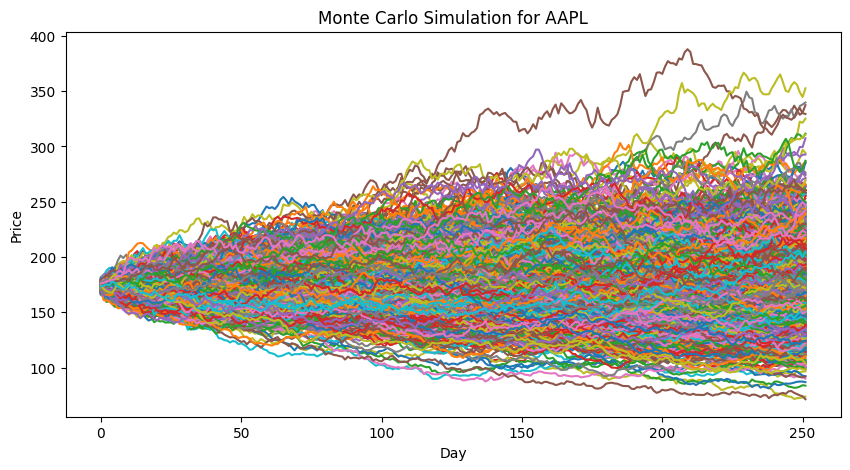

In [12]:
# Monte Carlo Simulation for AAPL
last_price = aapl_data['Close'].iloc[-1]
returns = aapl_data['Close'].pct_change().dropna()

# Simulation parameters
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_volatility = returns.std()

    price_series = []

    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)

    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1

    simulation_df[x] = price_series

plt.figure(figsize=(10,5))
plt.plot(simulation_df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for AAPL')
plt.show()


###Monte Carlo Simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.

###The Monte Carlo Simulation chart for AAPL showcases a multitude of potential future paths for AAPL's stock price. The myriad of lines represents different simulations, each following a random walk with drift according to the historical volatility of the stock. The spread of these lines indicates a range of possible stock prices over time, highlighting the uncertainty and risk associated with price predictions. This tool is especially useful for understanding the most extreme potential highs and lows in stock prices and can be instrumental in risk management and decision-making processes.